In [1]:
# This simple example can display the effect (on a small scale)
# of a single outlier with respect to more than one thousand regular expression.

import numpy as np
from scipy.stats.stats import pearsonr
np.random.seed(101)
normal = np.random.normal(loc = 0.0, scale = 1.0, size = 1000)

Mean: 0.026 Median: 0.032 Variance: 1.109


In [2]:
# Now we change a single value by inserting an outlying value

outlying = normal.copy()
outlying[0] = 50.0
print ('Mean: %0.3f Median: %0.3f Variance: %0.3f' % (np.mean(outlying), np.median(outlying),
                                                     np.var(outlying)))
print ("Pearson\'s correlation coefficient: %0.3f p-value: %0.3f" % pearsonr(normal, outlying))

Mean: 0.074 Median: 0.032 Variance: 3.597
Pearson's correlation coefficient: 0.619 p-value: 0.000


In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
x,y = diabetes.data, diabetes.target

In [6]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
df = pd.DataFrame(x)
print (df.describe())

           0      1      2      3      4      5      6      7      8      9
count 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00
mean   -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00  -0.00
std     0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05
min    -0.11  -0.04  -0.09  -0.11  -0.13  -0.12  -0.10  -0.08  -0.13  -0.14
25%    -0.04  -0.04  -0.03  -0.04  -0.03  -0.03  -0.04  -0.04  -0.03  -0.03
50%     0.01  -0.04  -0.01  -0.01  -0.00  -0.00  -0.01  -0.00  -0.00  -0.00
75%     0.04   0.05   0.03   0.04   0.03   0.03   0.03   0.03   0.03   0.03
max     0.11   0.05   0.17   0.13   0.15   0.20   0.18   0.19   0.13   0.14


Axes(0.125,0.125;0.775x0.755)


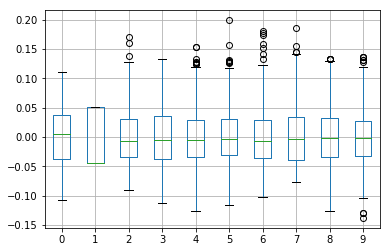

In [16]:
# using box plot
import matplotlib.pyplot as plt
box_plots = df.boxplot()
print (box_plots)
plt.show()

In [21]:
# leveraging on the Gaussian distribution

from sklearn.preprocessing import StandardScaler
Xs = StandardScaler().fit_transform(x)
o_idx = np.where(np.abs(Xs) > 3)

# .any(1) method will avoid duplicating
print (df[(np.abs(Xs) > 3).any(1)])

        0     1     2     3     4     5     6     7     8     9
58   0.04 -0.04 -0.06  0.04  0.01 -0.06  0.18 -0.08 -0.00 -0.05
123  0.01  0.05  0.03 -0.00  0.15  0.20 -0.06  0.19  0.02  0.07
216  0.01  0.05  0.04  0.05  0.05  0.07 -0.07  0.15  0.05  0.05
230 -0.04  0.05  0.07 -0.06  0.15  0.16  0.00  0.07  0.05  0.07
256 -0.05 -0.04  0.16 -0.05 -0.03 -0.02 -0.05  0.03  0.03  0.01
260  0.04 -0.04 -0.01 -0.06  0.01 -0.03  0.15 -0.08 -0.08 -0.02
261  0.05 -0.04 -0.04  0.10  0.04 -0.03  0.18 -0.08 -0.01  0.02
269  0.01 -0.04 -0.03 -0.03  0.04 -0.01  0.16 -0.08 -0.01 -0.04
322  0.02  0.05  0.06  0.06  0.02 -0.04 -0.09  0.16  0.13  0.08
336 -0.02 -0.04  0.09 -0.04  0.09  0.09 -0.06  0.15  0.08  0.05
367 -0.01  0.05  0.17  0.01  0.03  0.03 -0.02  0.03  0.03  0.03
441 -0.05 -0.04 -0.07 -0.08  0.08  0.03  0.17 -0.04 -0.00  0.00


In [22]:
# using principal component analysis

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.tools.plotting import scatter_matrix
dim_reduction = PCA()
Xc = dim_reduction.fit_transform(scale(x))
print ('Variance explained by the first 2 components: %0.1f%%' 
      % sum(dim_reduction.explained_variance_ratio_[:2]*100))
print ('Variance explained by the last 2 components: %0.1f%%' 
      % sum(dim_reduction.explained_variance_ratio_[-2:]*100))

df = pd.DataFrame(Xc, columns = ['comp_'+ str(j+1) for j in range(10)])


Variance explained by the first 2 components: 55.2%
Variance explained by the last 2 components: 0.9%


In [24]:
first_two = df.plot(kind = 'scatter', x= 'comp_1', y = 'comp_2', c = 'DarkGray', s = 50)
last_two = df.plot(kind = 'scatter', x= 'comp_9', y = 'comp_10', c = 'DarkGray', s= 50)

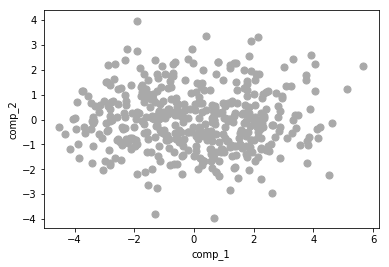

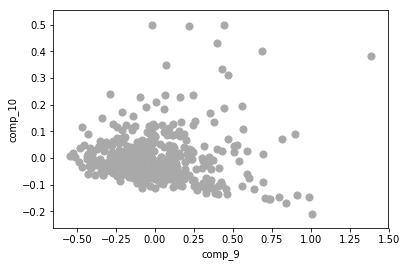

In [25]:
plt.show()

In [26]:
# using cluster analysis

In [29]:
# using DBScan

from sklearn.cluster import DBSCAN
DB = DBSCAN(eps = 2.5, min_samples = 25)
DB.fit(Xc)
from collections import Counter
print (Counter(DB.labels_), '\n')
print (df[DB.labels_ == -1])
Counter({0:414, -1:28})

Counter({0: 414, -1: 28}) 

     comp_1  comp_2  comp_3  comp_4  comp_5  comp_6  comp_7  comp_8  comp_9  \
15     2.95    0.95   -1.98   -0.79    1.77   -1.05    1.38   -0.88    0.35   
23     3.77   -1.76    1.09    0.72   -0.64    1.90    0.56    1.09    0.44   
29    -0.36   -1.41    3.27   -0.67    0.05    0.97    0.96    1.10   -0.17   
35    -0.70    1.88    1.36   -1.58    0.02    1.12   -0.04    2.12    0.32   
78    -1.57   -1.29   -0.66    0.50   -1.64   -0.64    1.98   -0.23   -0.22   
117    3.49    0.19    1.29    0.46   -0.80    1.71    0.84   -1.77    0.09   
123    5.67    2.16   -2.83   -0.98    0.43    0.22   -1.25   -0.85    0.70   
141    3.31   -0.02   -1.76    1.79   -0.94    1.92   -1.10   -0.77    0.64   
161    5.13    1.23   -1.13    0.32    1.91    0.54   -0.07   -0.15    0.00   
169    2.35    0.15   -0.13    1.19   -0.64    0.64    2.65   -0.31    0.22   
230    3.93    2.59   -2.08    0.03    1.03    0.84   -1.40    1.38   -0.34   
248    4.05    2.23   -1

Counter({-1: 28, 0: 414})

In [32]:
import tkinter.filedialog

In [37]:
import PyQt5

In [38]:
help (PyQt5)

Help on package PyQt5:

NAME
    PyQt5

DESCRIPTION
    # Copyright (c) 2016 Riverbank Computing Limited <info@riverbankcomputing.com>
    # 
    # This file is part of PyQt5.
    # 
    # This file may be used under the terms of the GNU General Public License
    # version 3.0 as published by the Free Software Foundation and appearing in
    # the file LICENSE included in the packaging of this file.  Please review the
    # following information to ensure the GNU General Public License version 3.0
    # requirements will be met: http://www.gnu.org/copyleft/gpl.html.
    # 
    # If you do not wish to use this file under the terms of the GPL version 3.0
    # then you may purchase a commercial license.  For more information contact
    # info@riverbankcomputing.com.
    # 
    # This file is provided AS IS with NO WARRANTY OF ANY KIND, INCLUDING THE
    # WARRANTY OF DESIGN, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

PACKAGE CONTENTS
    Enginio
    QAxContainer
    Qt
    

In [39]:
from PyQt5 import QtSensors

In [41]:
from PyQt5 import *

In [44]:
from PyQt5 import QtHelp

In [46]:
QtHelp.QHelpSearchEngine.__doc__

'QHelpSearchEngine(QHelpEngineCore, parent: QObject = None)'

In [47]:
from sklearn import svm
outliers_fraction = 0.01 
nu_estimate = 0.95 * outlier_fraction + 0.05
auto_detection = svm.OneClassSVM(kernel = 'rbf', gamma = 0.01, degree = 3, nu = nu_estimate)
auto_detection.fit(Xc)
evaluation = auto_detection.predict(Xc)
print (df[evaluation == -1])

NameError: name 'outlier_fraction' is not defined